In [1]:
""" Implementation of Principal Component Analysis (PCA) with
Artificial Neural Network (ANN) algorithm for the Face Recognition """

# The Python code for this project is done in 'Google Colab'

# Numpy, Matplotlib, OpenCV, sklearn libraries are used
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """ Helper function to plot a gallery of portraits """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [6]:
""" The Faces of actors and actresses and Iris datasets are uploaded into Google
drive under content section in Google Colab"""

dir_name= "/content/drive/MyDrive/faces/"
y=[];X=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    dir_path = dir_name+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        # Formulating the image path (the actors facial images)
        image_path = dir_path+image_name
        # Read the input image using OpenCV library(cv2) function-imread()
        img = cv2.imread(image_path)
        # Convert the image into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Resize image to 300*300 dimension
        resized_image= cv2.resize(gray,(h,w))
        # Convert matrix into vector (as column vector)
        v = resized_image.flatten()
        X.append(v)
        # Increase the number of samples
        n_samples =n_samples+1
        # Adding or appending the categorical label
        y.append(person_id)
        # Adding or appending the person name
        target_names.append(person_name)
    # Increment the person id by 1
    person_id=person_id+1

# Transform list to numpy array
y=np.array(y)
X=np.array(X)
target_names =np.array(target_names)
n_features = X.shape[1]
print(y.shape,X.shape,target_names.shape)
print("Number of sampels:",n_samples)

n_classes = target_names.shape[0]
print("Total dataset size:") #Printing the total dataset and number of samples
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

(450,) (450, 90000) (450,)
Number of sampels: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


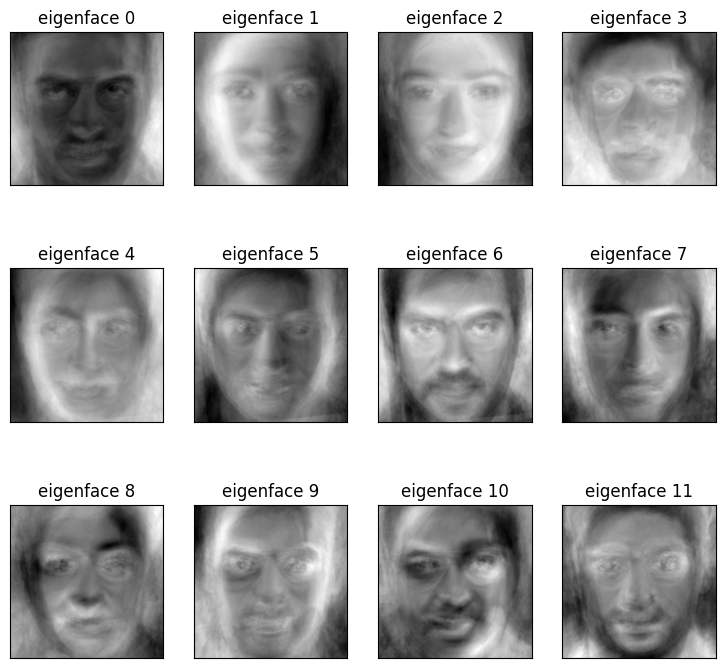

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
The project implementation is done!!...


In [7]:
"""Splitting dataset into a training set and a testing set using a
stratified k fold """

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Compute a PCA (eigenfaces) on the face dataset
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"% (n_components, X_train.shape[0]))

# Applying PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# Generating the eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

# Compute Fisherfaces
lda = LinearDiscriminantAnalysis()
# Compute LDA of reduced data
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("The project implementation is done!!...")

In [8]:
# Apply ANN for training (multi-layer perceptron training)
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10),max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.49331301
Iteration 2, loss = 3.43001760
Iteration 3, loss = 3.37079582
Iteration 4, loss = 3.31181919
Iteration 5, loss = 3.25377199
Iteration 6, loss = 3.20059972
Iteration 7, loss = 3.14645056
Iteration 8, loss = 3.09502178
Iteration 9, loss = 3.04574024
Iteration 10, loss = 2.99736039
Iteration 11, loss = 2.94917512
Iteration 12, loss = 2.90492643
Iteration 13, loss = 2.85828985
Iteration 14, loss = 2.81511650
Iteration 15, loss = 2.77119599
Iteration 16, loss = 2.72927996
Iteration 17, loss = 2.69025569
Iteration 18, loss = 2.65021407
Iteration 19, loss = 2.61468065
Iteration 20, loss = 2.57734951
Iteration 21, loss = 2.54269317
Iteration 22, loss = 2.50765065
Iteration 23, loss = 2.47392306
Iteration 24, loss = 2.44152229
Iteration 25, loss = 2.40958191
Iteration 26, loss = 2.37943473
Iteration 27, loss = 2.34839747
Iteration 28, loss = 2.31891636
Iteration 29, loss = 2.28996880
Iteration 30, loss = 2.26102154
Iteration 31, loss = 2.23336727
Iteration 32, los

Accuracy: 75.22123893805309


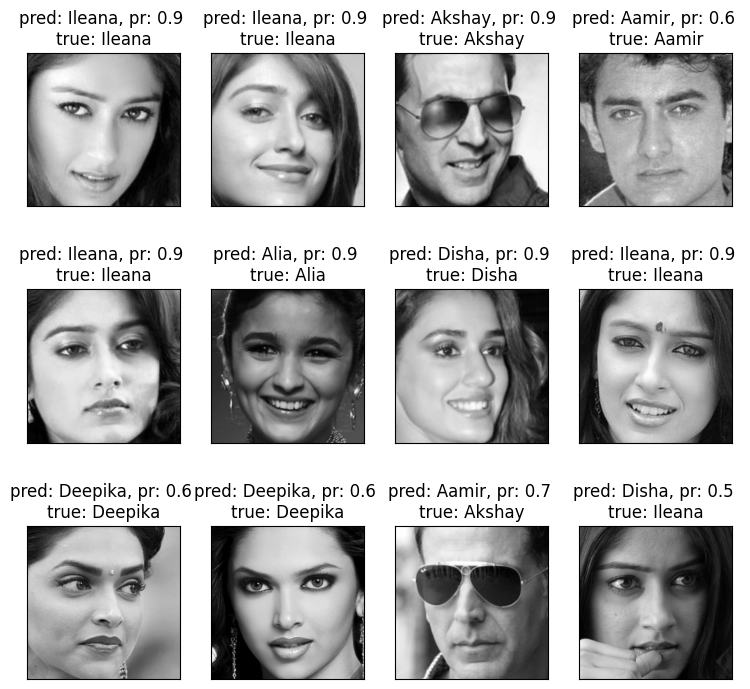

In [9]:
# Prediction on the test data
y_pred=[];y_prob=[]
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    # print(prob,np.max(prob))
    class_id = np.where(prob == np.max(prob))[0][0]
    # Find the label of the mathed face
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Transform the data
y_pred = np.array(y_pred)


prediction_titles=[]
true_positive = 0
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive =true_positive+1
# Printing the final classification accuracy
print("Accuracy:",true_positive*100/y_pred.shape[0])

# The class name with probability is displayed
plot_gallery(X_test, prediction_titles, h, w)
plt.show()

In [ ]:
""" The python code of implementation for the project along with the output generated
by the model are uploaded into Artificial_intelligence_project folder as a single
file in Google drive and the link of the same is shared under
Project submission section """